In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy import arange
T=11;
dt=0.3;
steps=int(T/dt);
print(steps)
print(dt*steps)

a=arange(0, T, dt)
print(a)
print(len(a))

36
10.799999999999999
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8]
37


In [3]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

In [4]:
samples = 1
N = 10
T=5000
res = p.gillespie_replicator_softmax(T,T/20,N=N,samples=samples)
print(res)

{'X': array([[[1.00000000e-001, 5.26312642e-012, 1.05212107e-012,
         1.41919216e-012, 1.58813505e-009, 7.12795689e-001,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 9.99999996e-001, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
        [1.00000000e-001, 4.83282945e-010, 1.03257713e-020,
         9.35142318e-021, 7.10818736e-027, 9.74247620e-025,
         9.99831908e-027, 8.48052242e-016, 2.79872962e-021,
         1.09764621e-018, 2.73849616e-027, 4.02019876e-031,
         8.02738042e-035, 2.28801232e-023, 1.67168182e-032,
         9.70349328e-040, 4.28142351e-058, 2.96012880e-058,
         1.95878543e-065, 4.53778300e-072, 3.02540929e-060],
        [1.00000000e-001, 1.00477612e-008, 2.00125721e-017,
         5.29417819e-028, 2.01950912e-031, 1.36924862e-015,
         3.46694053e-030, 3.7842

TypeError: 'Axes' object is not subscriptable

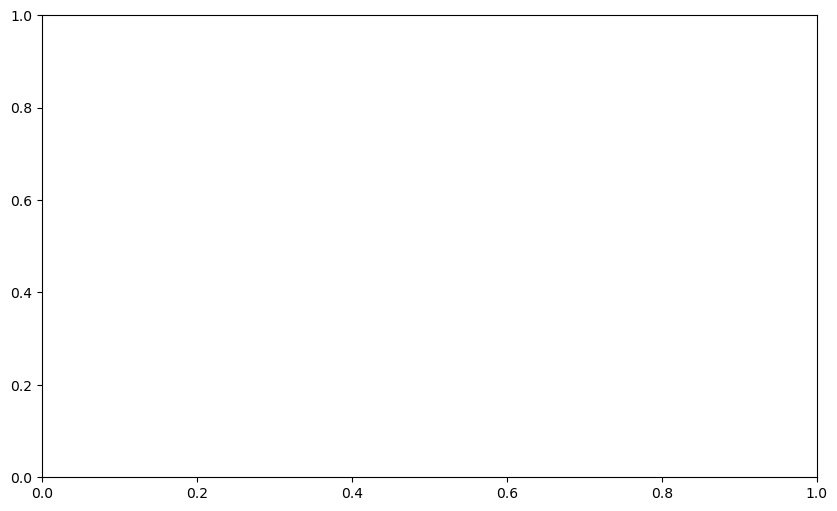

In [5]:

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i: ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
plt.tight_layout()
plt.show()



## three populations with different noise terms and identical mean fitness

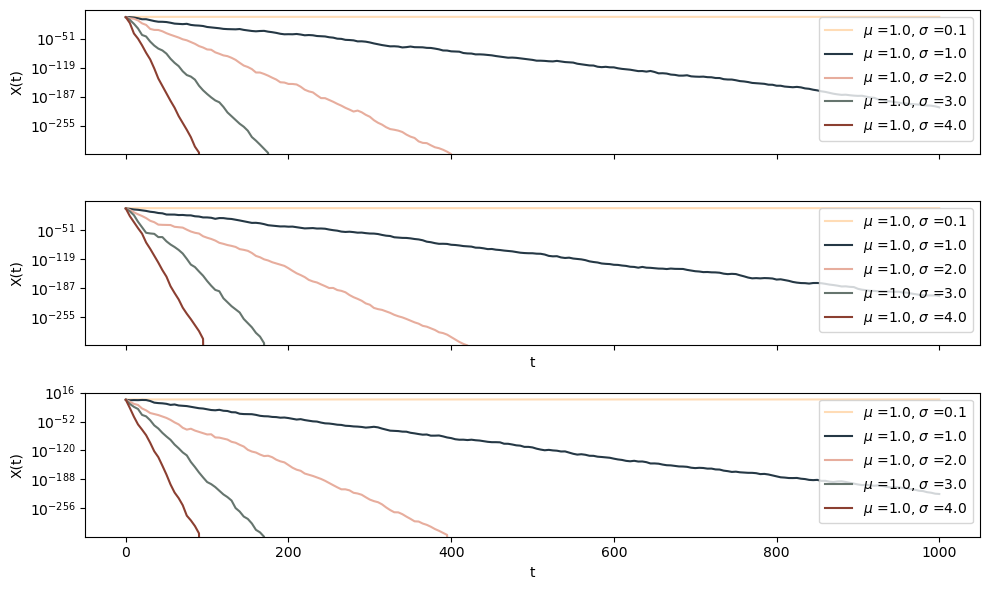

In [14]:
samples = 3
N = 5
sigma = np.array([0.1,1.0,2.0,3.0,4.0])

res = p.gillespie_replicator_softmax(1000,0.1,steps=2000,N=N,sigma=sigma,samples=samples,gap=10)

leg=[r"$\mu$ ="+f'{x:.1f}'+r", $\sigma$ ="+f'{y:.1f}' for (x,y) in zip(res["mu"],res["sigma"])]

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i: ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
        ax[i].set_yscale("log")
fig.tight_layout()
plt.show()


## two populations, many realizations

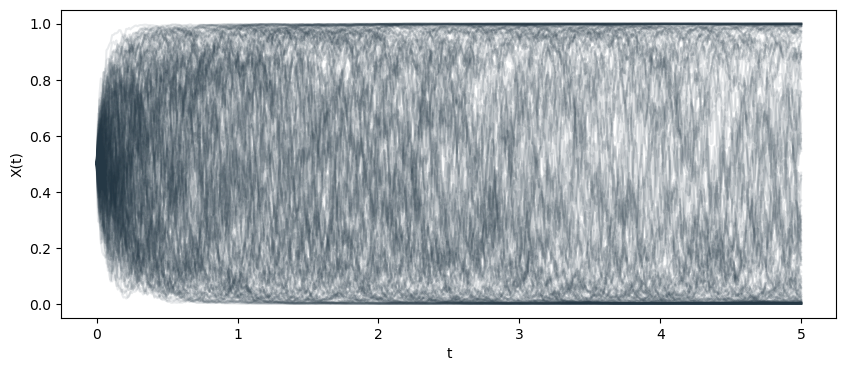

In [4]:
T = 5
samples = 200
N = 2
sigma = 2

res = p.gillespie_replicator(T,0.001,N=N,sigma=sigma,samples=samples,gap=10)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in range(samples):
    ax.plot(res["t"],np.squeeze(res["X"][i][0]),color="C1",alpha=0.1)
    ax.set_xlabel("t")
    ax.set_ylabel("X(t)")

plt.show()


## here's an example with non-trivial covariance

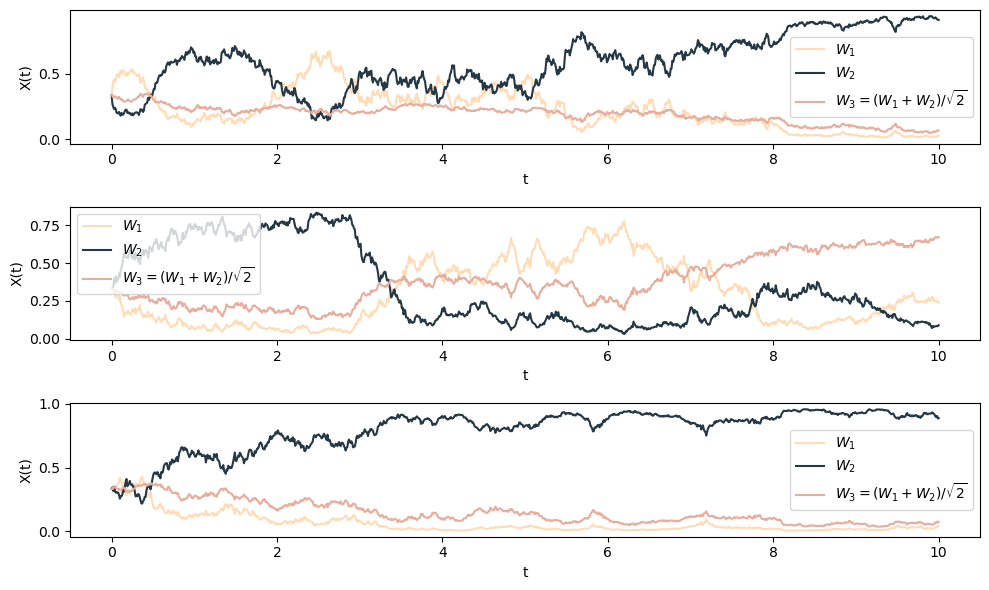

In [5]:
a = 1.0/np.sqrt(2)
cov = np.array([[1,0,a],[0,1,a],[a,a,1]])

samples = 3
N = 3


res = p.gillespie_replicator(10,0.001,N=N,covariance=cov,samples=samples,gap=10)

leg=[r"$W_1$",r"$W_2$",r"$W_3=(W_1+W_2)/\sqrt{2}$"]

fig,ax = plt.subplots(samples,1,figsize=[10,6])
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
fig.tight_layout()
plt.show()
